In [2]:
!nvidia-smi

Sun Jul 23 08:51:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [11]:
!unzip '/content/gdrive/MyDrive/css-data.zip' -d '/content/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/images/autox4_mp4-112_jpg.rf.889d826e6c48099cdbaffc4cde949c1a.jpg  
  inflating: /content/train/images/autox4_mp4-112_jpg.rf.dfb0c2b0da41e5c1cc6287d06ee92aea.jpg  
  inflating: /content/train/images/autox4_mp4-112_jpg.rf.f19a9dc748d2bcfebbedbf5877b6f76e.jpg  
  inflating: /content/train/images/autox4_mp4-42_jpg.rf.146b0e51a6d2ed699aba1c2f0fccc723.jpg  
  inflating: /content/train/images/autox4_mp4-42_jpg.rf.168d938b73a3fad1e02467e01689fb8d.jpg  
  inflating: /content/train/images/autox4_mp4-42_jpg.rf.7cd00519a8916b471f617fc9d406eb8b.jpg  
  inflating: /content/train/images/autox4_mp4-42_jpg.rf.b46d66b710aa73867b319e1c40104df9.jpg  
  inflating: /content/train/images/autox4_mp4-42_jpg.rf.b99f0b25bd84cdd7fb96017ebd68e303.jpg  
  inflating: /content/train/images/autox5_mp4-34_jpg.rf.3b424b05f74f7befdf767c9d9d8cc156.jpg  
  inflating: /content/train/images/autox5_mp4-34_jpg.rf.3c78d4783f9d8451aa12e1a2177ec740.jp

In [4]:
import os
HOME = os.getcwd()
HOME

'/content'

In [5]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.6/606.6 kB 5.4 MB/s eta 0:00:00


In [16]:
from IPython.display import display, Image

In [6]:
from ultralytics import YOLO

In [7]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 216MB/s]


In [8]:
!touch data.yaml

In [12]:
!yolo task=detect mode=train epochs=10 data="/content/data.yaml" model=yolov8n.pt imgsz=640

Ultralytics YOLOv8.0.140 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

In [13]:
!yolo task = detect mode = predict model = "/content/runs/detect/train3/weights/best.pt" source = "/content/construction-safety.jpg"

Ultralytics YOLOv8.0.140 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients

image 1/1 /content/construction-safety.jpg: 448x640 3 Hardhats, 4 Persons, 3 Safety Vests, 1 machinery, 81.3ms
Speed: 3.8ms preprocess, 81.3ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


In [14]:
!yolo task = detect mode = val model = "/content/runs/detect/train3/weights/best.pt" data="/content/data.yaml"

Ultralytics YOLOv8.0.140 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients
val: Scanning /content/valid/labels.cache... 114 images, 10 backgrounds, 0 corrupt: 100% 114/114 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:06<00:00,  1.20it/s]
                   all        114        697      0.869      0.584       0.68       0.35
               Hardhat        114         79      0.916      0.696      0.776       0.45
                  Mask        114         21      0.958       0.81      0.824       0.47
            NO-Hardhat        114         69      0.869      0.481      0.549      0.236
               NO-Mask        114         74      0.927      0.343      0.527      0.216
        NO-Safety Vest        114        106      0.755      0.519      0.593      0.287
                Person        114        166      0.844      0.645      0.

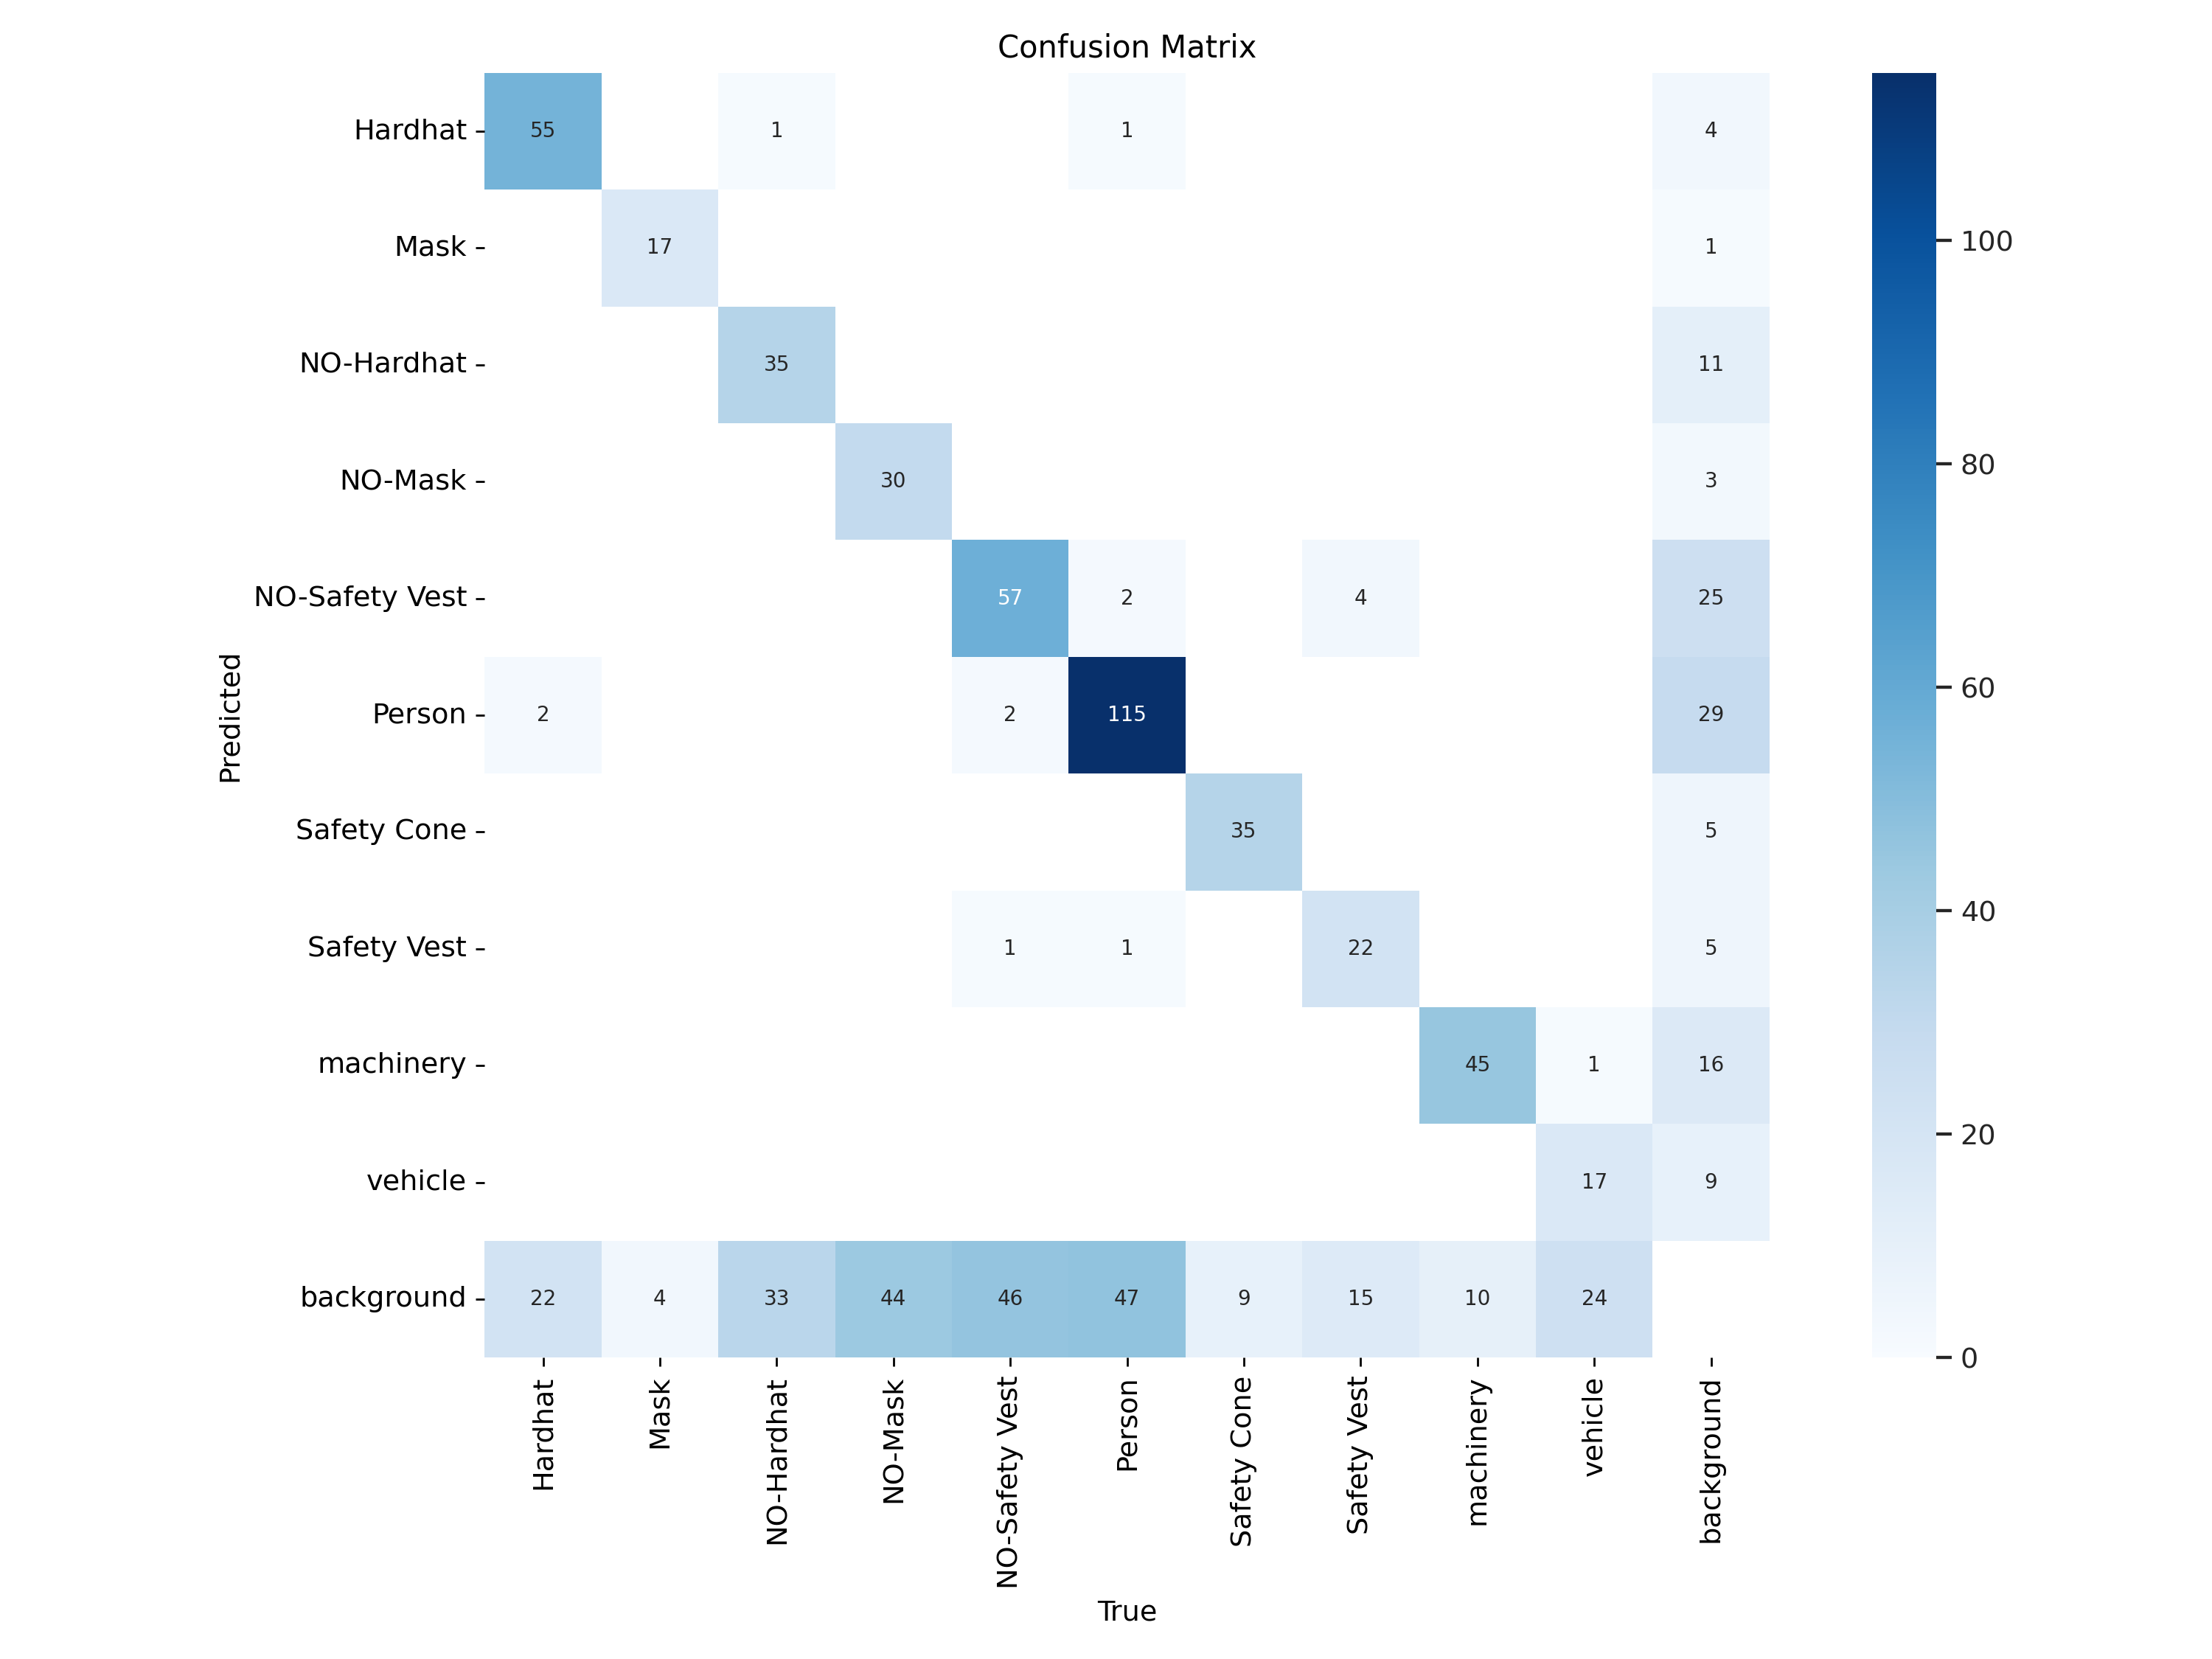

In [17]:
Image(filename= "/content/runs/detect/val/confusion_matrix.png")

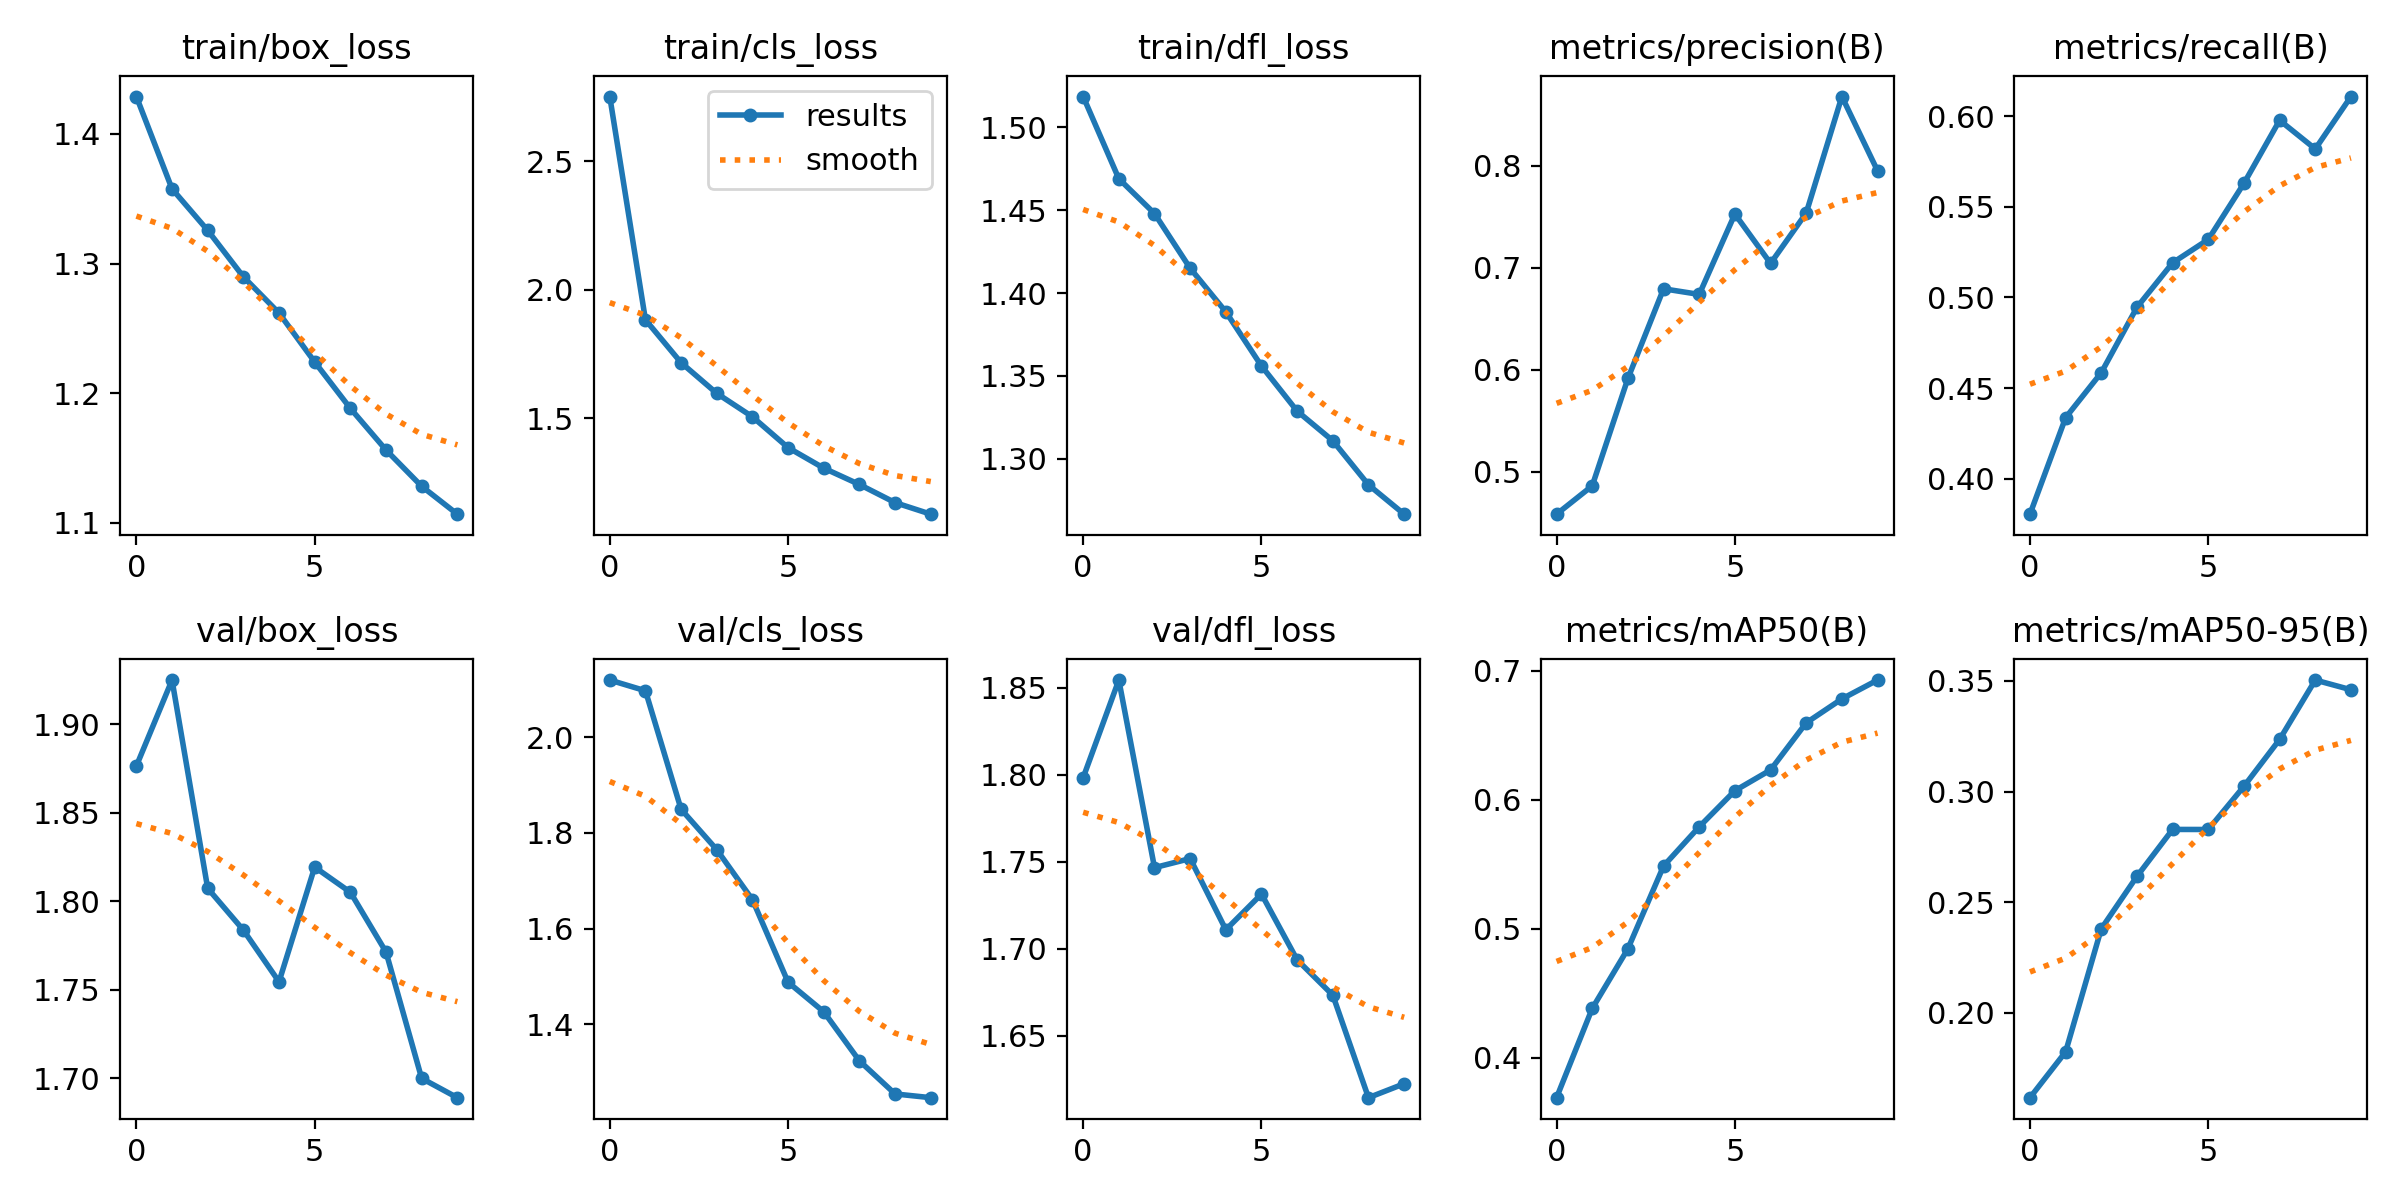

In [18]:
Image(filename= "/content/runs/detect/train3/results.png")

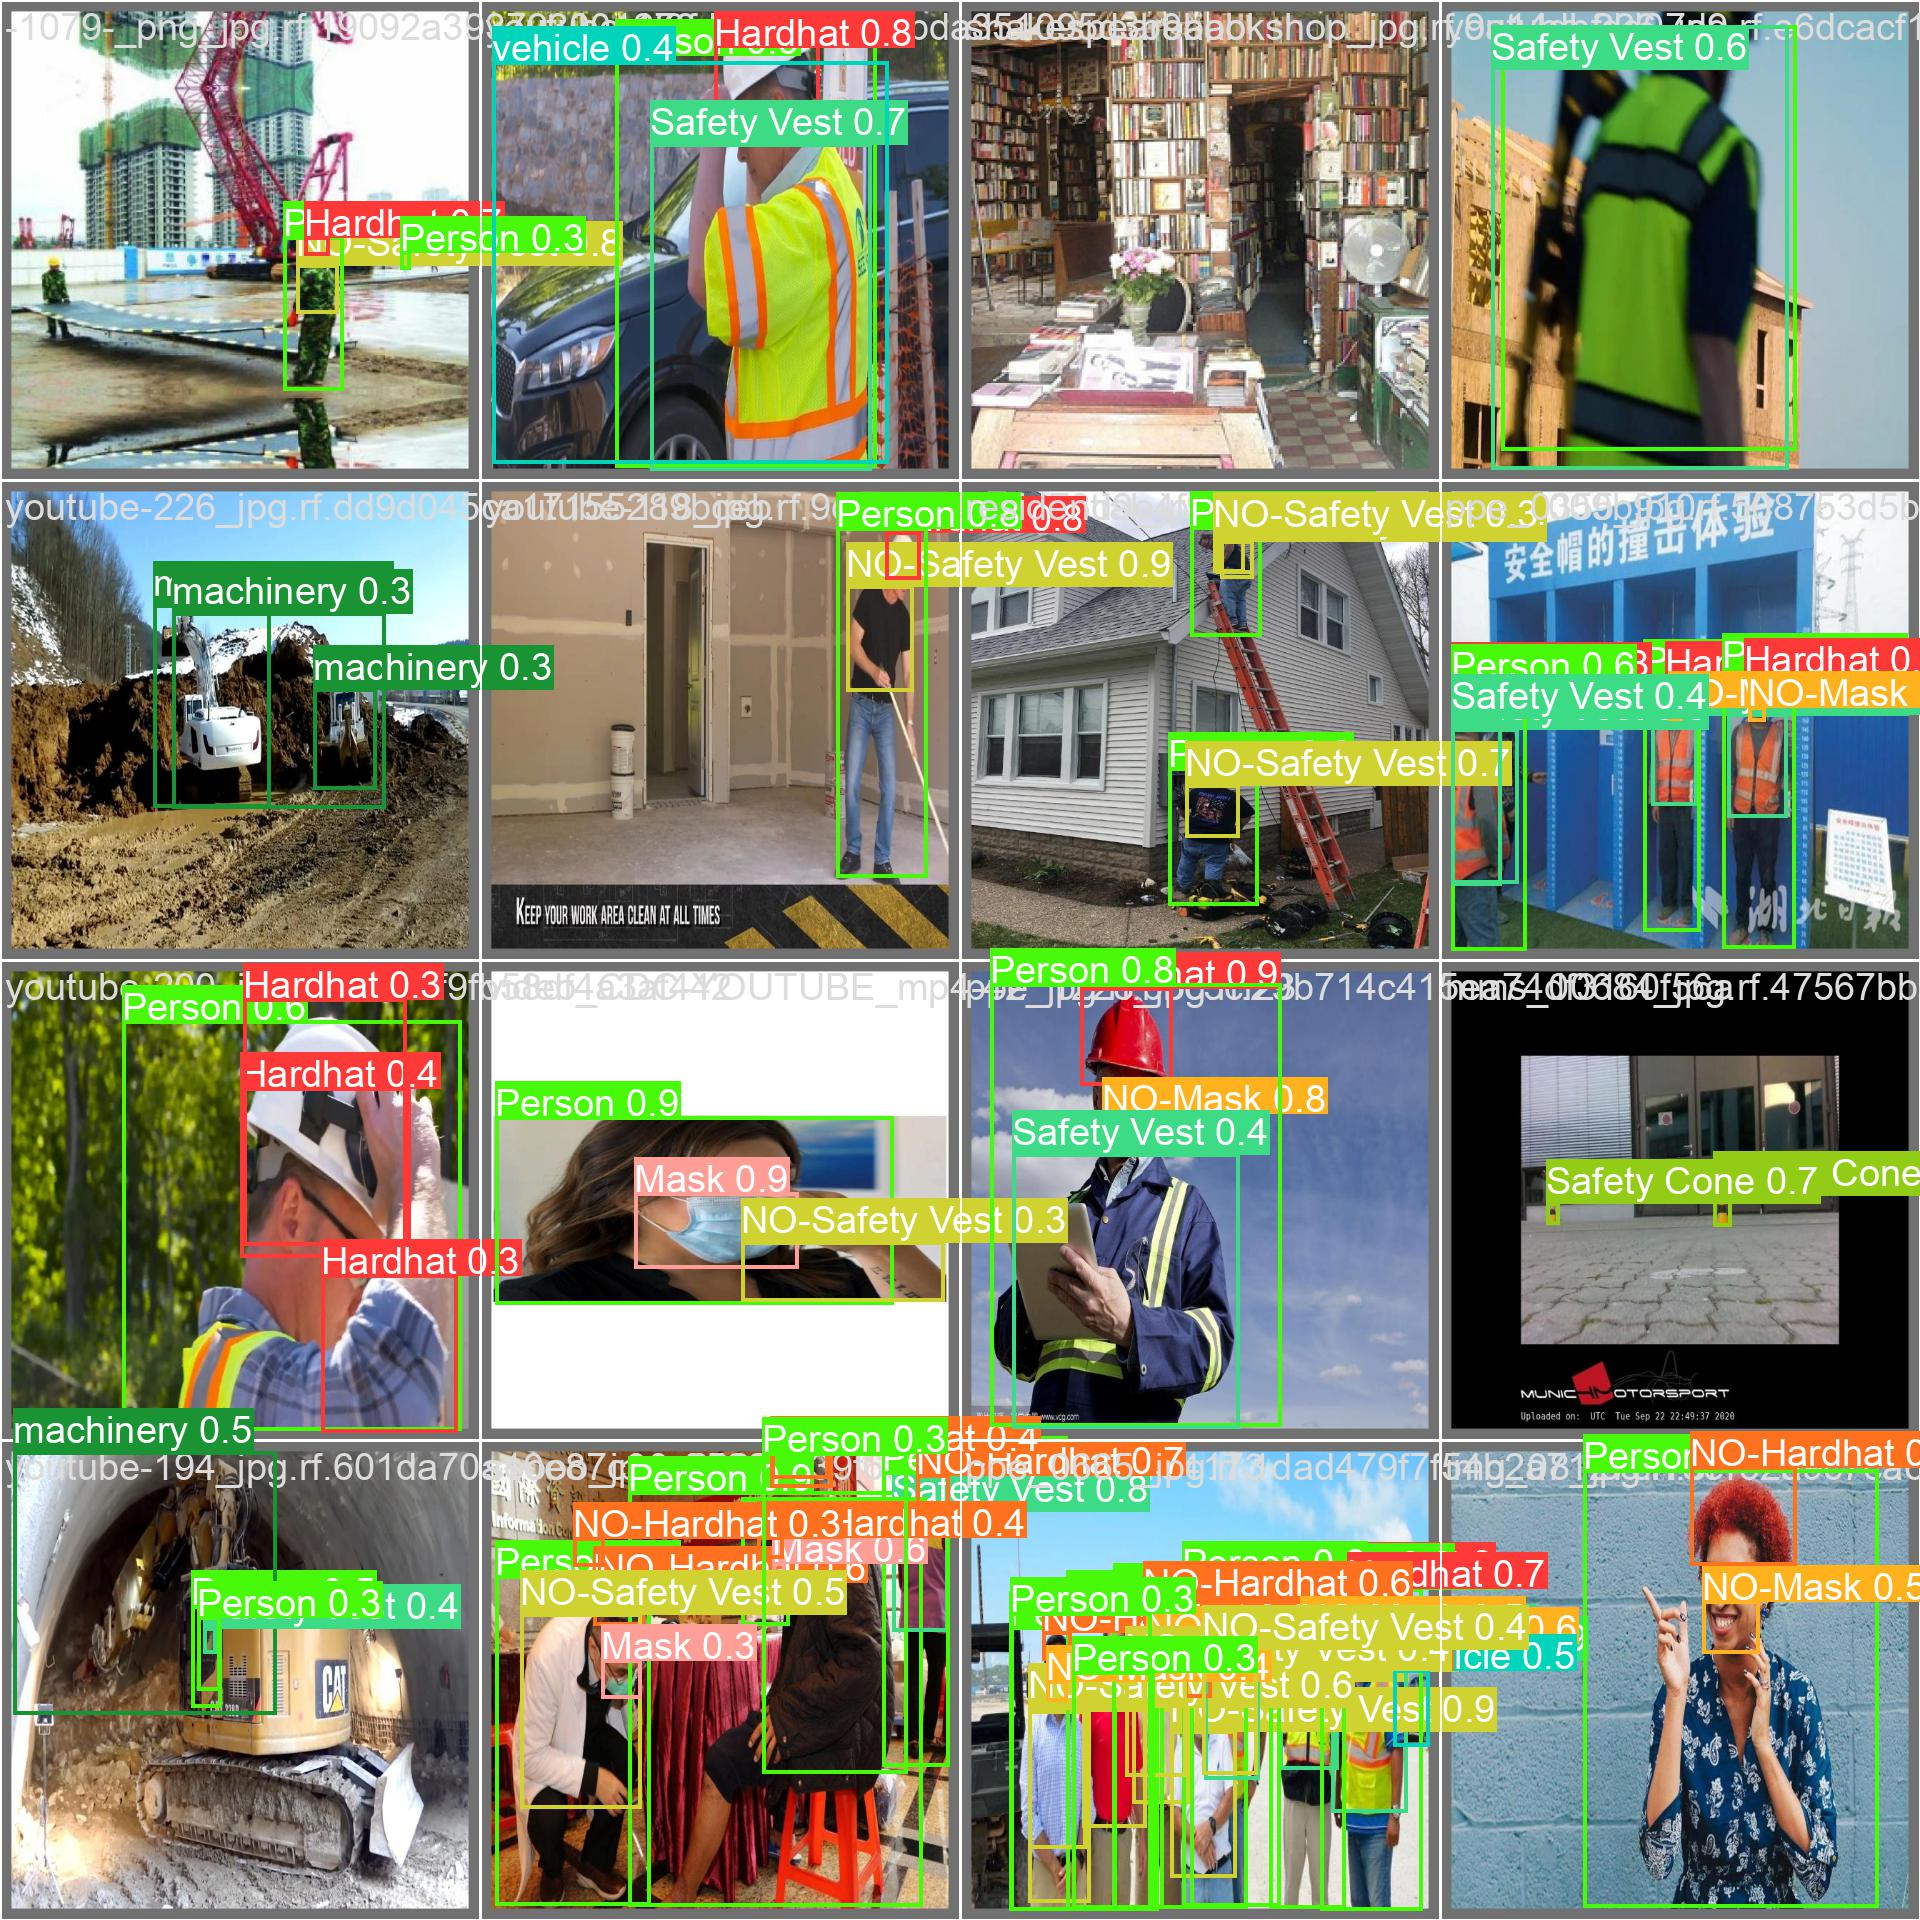

In [19]:
Image(filename= "/content/runs/detect/train3/val_batch0_pred.jpg")

In [20]:
!yolo task = detect mode = predict model = "/content/runs/detect/train3/weights/best.pt" source = "/content/construction.mp4"

Ultralytics YOLOv8.0.140 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients

video 1/1 (1/648) /content/construction.mp4: 384x640 1 Hardhat, 2 Persons, 1 Safety Vest, 1 machinery, 82.5ms
video 1/1 (2/648) /content/construction.mp4: 384x640 1 Hardhat, 2 Persons, 1 Safety Vest, 2 machinerys, 7.4ms
video 1/1 (3/648) /content/construction.mp4: 384x640 1 Hardhat, 2 Persons, 1 Safety Vest, 1 machinery, 7.4ms
video 1/1 (4/648) /content/construction.mp4: 384x640 1 Hardhat, 2 Persons, 1 Safety Vest, 1 machinery, 6.6ms
video 1/1 (5/648) /content/construction.mp4: 384x640 2 Hardhats, 2 Persons, 1 Safety Vest, 1 machinery, 7.3ms
video 1/1 (6/648) /content/construction.mp4: 384x640 1 Hardhat, 2 Persons, 1 Safety Vest, 1 machinery, 1 vehicle, 7.6ms
video 1/1 (7/648) /content/construction.mp4: 384x640 1 Hardhat, 2 Persons, 1 Safety Vest, 1 machinery, 1 vehicle, 7.3ms
video 1/1 (8/648) /content/construction.mp4: 384x640 1 Ha